In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from scipy.integrate import solve_ivp
from scipy.stats import sem

from models import *
import stars

from stars.rto.master_vkc import MasterVKC
from stars.rto.reactions import Component, Kinetics

%load_ext autoreload
%autoreload 2

In [2]:
##### SET CONSTANTS FOR ALL SIMULATIONS
TFINAL = 300
TEMP_MAX = 750
T0 = 25.0
O2_init = 0.21
So = 0.1

# Generate Synthetic Data

Use Cinar (2011) reaction model: 
\begin{align*}
1.0 Oil + 4.00 O_2 &\rightarrow 10.00 Coke_1 + 22.389 H_2O  \\
1.0 Coke_1 + 1.50 O_2 &\rightarrow 1.0CO + 1.0 CO_2  \\
1.0 Coke_1 &\rightarrow 2.0 Coke_2 \\
1.0 Coke_2 + 1.4375 O_2 &\rightarrow 0.5 CO + 1.0 CO_2
\end{align*}
from Ogunbanwo (2018).

Run dense sampling of heating rates from 2.0 to 30.0.


In [3]:
# Run ramp-hold heating curves

exe_path = '"C:\\Program Files (x86)\\CMG\\STARS\\2017.10\\Win_x64\\EXE\\st201710.exe"'

hrs = [2.0*(i+1) for i in range(15)]
Time = np.arange(0,TFINAL,1)

IC_dict = {'Oil': So, 'O2': O2_init, 'Temp': T0}

# Run STARS simulation
for i, hr in enumerate(hrs):
    
    Temp_max = 180 + 19*hr
    print('Running heating schedule {} with heating rate={} and T_max={}...'.format(str(i), str(hr), str(Temp_max)))
    
    Temp = np.minimum(hr*Time+IC_dict['Temp'], Temp_max)
    hr_dict = {'Time': Time, 'Temp': Temp}
    
    cd_path = os.path.join('datasets','synthetic','ramp_hold','schedule_'+str(i+1))
    if not os.path.exists(cd_path):
        os.makedirs(cd_path)
    kc = MasterVKC(folder_name = os.path.join(cd_path,''))
    Components_dict, Reactions_list = kc.get_default_reaction()
    kc.write_dat_file(COMPS=Components_dict, REACTS=Reactions_list, IC_dict=IC_dict, HR=hr_dict, 
                        TFINAL=TFINAL, TEMP_MAX = Temp_max, O2_con_in = IC_dict['O2'])
    kc.run_dat_file(exe_path, cd_path)
    
    # Save effluence data
    t, ydict = kc.get_reaction_dict()
    df_out = pd.DataFrame()
    df_out['Time'] = t*60
    df_out['Oil'] = ydict['Oil']
    df_out['O2'] = ydict['O2']
    df_out['H2O'] = ydict['H2O']
    df_out['CO'] = ydict['CO']
    df_out['CO2'] = ydict['CO2']
    df_out['N2'] = ydict['N2']
    df_out['Temp'] = ydict['Temp']
    df_out.to_excel(os.path.join('datasets','synthetic','ramp_hold', 'schedule_'+str(i+1) + '.xls'))
    
    # Print effluence and temperature data to figures
    plt.plot(t, ydict['O2'])
    plt.plot(t, ydict['CO'])
    plt.plot(t, ydict['CO2'])
    plt.plot(t, ydict['N2'])
    plt.xlabel('Time [min]')
    plt.ylabel('Concentration [% mol]')
    plt.title('Effluence - Schedule #' + str(i+1))
    plt.legend(['O2', 'CO', 'CO2', 'N2'])
    plt.savefig(os.path.join(cd_path, 'effluence.png'))
    plt.close()
    
    plt.plot(t, ydict['Temp'])
    plt.xlabel('Time [min]')
    plt.ylabel('Temperature [C]')
    plt.title('Temperature -Schedule #'+str(i+1))
    plt.savefig(os.path.join(cd_path, 'temperature.png'))
    plt.close()

Running heating schedule 0 with heating rate=2.0 and T_max=218.0...
Running heating schedule 1 with heating rate=4.0 and T_max=256.0...
Running heating schedule 2 with heating rate=6.0 and T_max=294.0...
Running heating schedule 3 with heating rate=8.0 and T_max=332.0...
Running heating schedule 4 with heating rate=10.0 and T_max=370.0...
Running heating schedule 5 with heating rate=12.0 and T_max=408.0...
Running heating schedule 6 with heating rate=14.0 and T_max=446.0...
Running heating schedule 7 with heating rate=16.0 and T_max=484.0...
Running heating schedule 8 with heating rate=18.0 and T_max=522.0...
Running heating schedule 9 with heating rate=20.0 and T_max=560.0...
Running heating schedule 10 with heating rate=22.0 and T_max=598.0...
Running heating schedule 11 with heating rate=24.0 and T_max=636.0...
Running heating schedule 12 with heating rate=26.0 and T_max=674.0...
Running heating schedule 13 with heating rate=28.0 and T_max=712.0...
Running heating schedule 14 with h

In [11]:
# Run regular linear heating curves

exe_path = '"C:\\Program Files (x86)\\CMG\\STARS\\2017.10\\Win_x64\\EXE\\st201710.exe"'

hrs = [2.0*(i+1) for i in range(15)]
Time = np.arange(0,TFINAL,1)

IC_dict = {'Oil': So, 'O2': O2_init, 'Temp': T0}

# Run STARS simulation
for i, hr in enumerate(hrs):
    
    Temp_max = TEMP_MAX
    print('Running heating schedule {} with heating rate={} and T_max={}...'.format(str(i), str(hr), str(Temp_max)))
    
    Temp = np.minimum(hr*Time+IC_dict['Temp'], Temp_max)
    hr_dict = {'Time': Time, 'Temp': Temp}
    
    cd_path = os.path.join('datasets','synthetic','ramp_vanilla','schedule_'+str(i+1))
    if not os.path.exists(cd_path):
        os.makedirs(cd_path)
    kc = MasterVKC(folder_name = os.path.join(cd_path,''))
    Components_dict, Reactions_list = kc.get_default_reaction()
    kc.write_dat_file(COMPS=Components_dict, REACTS=Reactions_list, IC_dict=IC_dict, HR=hr_dict, 
                        TFINAL=TFINAL, TEMP_MAX = Temp_max, O2_con_in = IC_dict['O2'])
    kc.run_dat_file(exe_path, cd_path)
    
    # Save effluence data
    t, ydict = kc.get_reaction_dict()
    df_out = pd.DataFrame()
    df_out['Time'] = t*60
    df_out['Oil'] = ydict['Oil']
    df_out['O2'] = ydict['O2']
    df_out['H2O'] = ydict['H2O']
    df_out['CO'] = ydict['CO']
    df_out['CO2'] = ydict['CO2']
    df_out['N2'] = ydict['N2']
    df_out['Temp'] = ydict['Temp']
    df_out.to_excel(os.path.join('datasets','synthetic','ramp_vanilla', 'schedule_'+str(i+1) + '.xls'))
    
    # Print effluence and temperature data to figures
    plt.plot(t, ydict['O2'])
    plt.plot(t, ydict['CO'])
    plt.plot(t, ydict['CO2'])
    plt.plot(t, ydict['N2'])
    plt.xlabel('Time [min]')
    plt.ylabel('Concentration [% mol]')
    plt.title('Effluence - Schedule #' + str(i+1))
    plt.legend(['O2', 'CO', 'CO2', 'N2'])
    plt.savefig(os.path.join(cd_path, 'effluence.png'))
    plt.close()
    
    plt.plot(t, ydict['Temp'])
    plt.xlabel('Time [min]')
    plt.ylabel('Temperature [C]')
    plt.title('Temperature -Schedule #'+str(i+1))
    plt.savefig(os.path.join(cd_path, 'temperature.png'))
    plt.close()

Running heating schedule 0 with heating rate=2.0 and T_max=750...
Running heating schedule 1 with heating rate=4.0 and T_max=750...
Running heating schedule 2 with heating rate=6.0 and T_max=750...
Running heating schedule 3 with heating rate=8.0 and T_max=750...
Running heating schedule 4 with heating rate=10.0 and T_max=750...
Running heating schedule 5 with heating rate=12.0 and T_max=750...
Running heating schedule 6 with heating rate=14.0 and T_max=750...
Running heating schedule 7 with heating rate=16.0 and T_max=750...
Running heating schedule 8 with heating rate=18.0 and T_max=750...
Running heating schedule 9 with heating rate=20.0 and T_max=750...
Running heating schedule 10 with heating rate=22.0 and T_max=750...
Running heating schedule 11 with heating rate=24.0 and T_max=750...
Running heating schedule 12 with heating rate=26.0 and T_max=750...
Running heating schedule 13 with heating rate=28.0 and T_max=750...
Running heating schedule 14 with heating rate=30.0 and T_max=7

In [4]:
# Run ramp-unramp-ramp heating curves

exe_path = '"C:\\Program Files (x86)\\CMG\\STARS\\2017.10\\Win_x64\\EXE\\st201710.exe"'

hrs = [2.0*(i+1) for i in range(15)]
Time = np.arange(0,TFINAL,1)

IC_dict = {'Oil': So, 'O2': O2_init, 'Temp': T0}

# Run STARS simulation
for i, hr in enumerate(hrs):
    print('Running heating schedule {}...'.format(str(hr)))
    
    Temp_max = 180 + 19*hr
    t_ramp = int(np.round(0.95*Temp_max/hr)) # ramp up to maximum temperature
    t_unramp = int(np.round(0.25*t_ramp)) # unramp for 25% of ramping time by -5 / HR
    t_end = int(np.round(TFINAL - t_ramp - t_unramp)) # ramp back up to maximum temperature
    hr_array = [hr]*t_ramp + [-5 / hr]*t_unramp + [hr]*t_end
    
    Temp = np.minimum(cumtrapz(hr_array, Time, initial=IC_dict['Temp']), Temp_max)
    hr_dict = {'Time': Time, 'Temp': Temp}
    
    cd_path = os.path.join('datasets','synthetic','ramp_unramp_ramp','schedule_'+str(i+1))
    if not os.path.exists(cd_path):
        os.makedirs(cd_path)
    kc = MasterVKC(folder_name = os.path.join(cd_path,''))
    Components_dict, Reactions_list = kc.get_default_reaction()
    kc.write_dat_file(COMPS=Components_dict, REACTS=Reactions_list, IC_dict=IC_dict, HR=hr_dict, 
                        TFINAL=TFINAL, TEMP_MAX = Temp_max, O2_con_in = IC_dict['O2'])
    kc.run_dat_file(exe_path, cd_path)
    
    # Save effluence data
    t, ydict = kc.get_reaction_dict()
    df_out = pd.DataFrame()
    df_out['Time'] = t*60
    df_out['Oil'] = ydict['Oil']
    df_out['O2'] = ydict['O2']
    df_out['H2O'] = ydict['H2O']
    df_out['CO'] = ydict['CO']
    df_out['CO2'] = ydict['CO2']
    df_out['N2'] = ydict['N2']
    df_out['Temp'] = ydict['Temp']
    df_out.to_excel(os.path.join('datasets','synthetic','ramp_unramp_ramp', 'schedule_'+str(i+1) + '.xls'))
    
    # Print effluence and temperature data to figures
    plt.plot(t, ydict['O2'])
    plt.plot(t, ydict['CO'])
    plt.plot(t, ydict['CO2'])
    plt.plot(t, ydict['N2'])
    plt.xlabel('Time [min]')
    plt.ylabel('Concentration [% mol]')
    plt.title('Effluence - Schedule #' + str(i+1))
    plt.legend(['O2', 'CO', 'CO2', 'N2'])
    plt.savefig(os.path.join(cd_path, 'effluence.png'))
    plt.close()
    
    plt.plot(t, ydict['Temp'])
    plt.xlabel('Time [min]')
    plt.ylabel('Temperature [C]')
    plt.title('Temperature -Schedule #'+str(i+1))
    plt.savefig(os.path.join(cd_path, 'temperature.png'))
    plt.close()

Running heating schedule 2.0...
Running heating schedule 4.0...
Running heating schedule 6.0...
Running heating schedule 8.0...
Running heating schedule 10.0...
Running heating schedule 12.0...
Running heating schedule 14.0...
Running heating schedule 16.0...
Running heating schedule 18.0...
Running heating schedule 20.0...
Running heating schedule 22.0...
Running heating schedule 24.0...
Running heating schedule 26.0...
Running heating schedule 28.0...
Running heating schedule 30.0...


# Make Plots for Different Proposed Heating Schedules

Minimum conversion rate: -0.0014486075810526398, maximum conversion rate: 0.1888852645406438


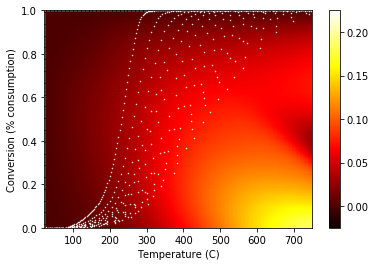

Minimum log-std. dev.: -10.182695862822623, maximum log-std. dev.: -4.528335638176079


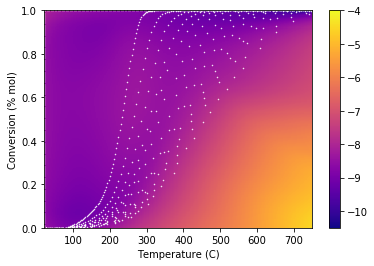

Minimum conversion rate: -0.0014418393438794521, maximum conversion rate: 0.1885539404270244


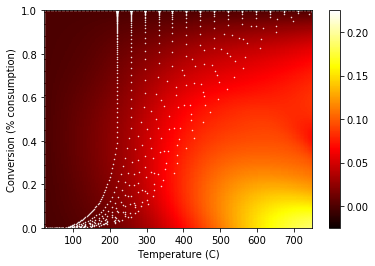

Minimum log-std. dev.: -9.952354002453037, maximum log-std. dev.: -4.519479873371876


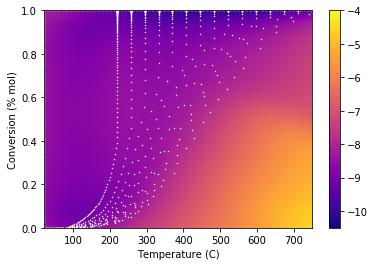

Minimum conversion rate: -0.001124764077894499, maximum conversion rate: 0.18944446208128152


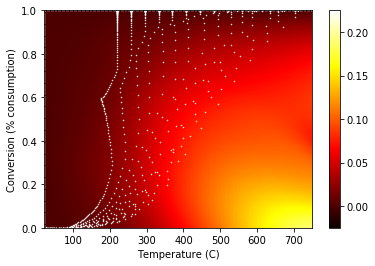

Minimum log-std. dev.: -9.928571363934017, maximum log-std. dev.: -4.568986080789702


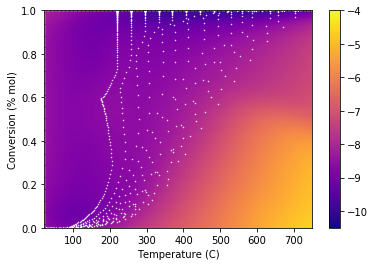

In [5]:
result_dir = os.path.join('results','experimental_design')

# # Print surfaces for ramp-hold curves
ramp_vanilla_container = NonArrheniusML(oil_type='synthetic', experiment='ramp_vanilla', clean_data=False)
ramp_vanilla_container.print_surf_plot(save_path = os.path.join(result_dir, 'ramp_vanilla_surf.png'),vmin=-0.025,vmax=0.225)
ramp_vanilla_container.print_uncertainty_surf(save_path = os.path.join(result_dir, 'ramp_vanilla_uncertainty.png'),vmin=-10.5,vmax=-4)

# Print surfaces for ramp-hold curves
ramp_hold_container = NonArrheniusML(oil_type='synthetic', experiment='ramp_hold', clean_data=False)
ramp_hold_container.print_surf_plot(save_path = os.path.join(result_dir, 'ramp_hold_surf.png'),vmin=-0.025,vmax=0.225)
ramp_hold_container.print_uncertainty_surf(save_path = os.path.join(result_dir, 'ramp_hold_uncertainty.png'),vmin=-10.5,vmax=-4)

# Print surfaces for ramp-unramp-ramp curves
unramp_hold_container = NonArrheniusML(oil_type='synthetic', experiment='ramp_unramp_ramp', clean_data=False)
unramp_hold_container.print_surf_plot(save_path = os.path.join(result_dir, 'ramp_unramp_ramp_surf.png'),vmin=-0.025,vmax=0.225)
unramp_hold_container.print_uncertainty_surf(save_path = os.path.join(result_dir, 'ramp_unramp_ramp_uncertainty.png'),vmin=-10.5,vmax=-4)

In [3]:
random_container = NonArrheniusInterp(oil_type='synthetic', experiment='random_curves', clean_data=False)

#### Run error estimate for regular linear heating rates

In [4]:
# Compute MSEs for vanilla RTO curves

np.random.seed(999)

MAX_NUMBER_EXPERIMENTS = 10
NUMBER_TRIALS = 10

MSE_interp_dict_vanilla = {}
MSE_ml_dict_vanilla = {}
MSE_mlc_dict_vanilla = {}


for num_heats in range(2,MAX_NUMBER_EXPERIMENTS+1, 2):
    print('Running for {} selected heating rates...'.format(str(num_heats)))
    
    # Simulate and collect MSEs
    MSEs_interp_vanilla, MSEs_ml_vanilla, MSEs_mlc_vanilla = [], [], []
    t = 0
    while t < NUMBER_TRIALS:
        try:
            print('Running trial {} for vanilla RTO data models...'.format(str(t+1)))
            # Choose heating rates
            selected_hrs = np.random.choice(np.arange(1,16),num_heats,replace=False).tolist()
            selected_hrs = ['schedule_'+str(int(hr)) for hr in selected_hrs]

            # Build prediction models
            nainterp = NonArrheniusInterp(oil_type='synthetic', experiment='ramp_vanilla', 
                                        clean_data=False, heating_rates=selected_hrs)
            naml_unc = NonArrheniusML(oil_type='synthetic', experiment='ramp_vanilla', 
                                        clean_data=False, heating_rates=selected_hrs)
            naml_const = NonArrheniusML(oil_type='synthetic', experiment='ramp_vanilla', 
                                        clean_data=False, heating_rates=selected_hrs, constrained=True)

            # Compute error across all extrapolated heating rates
            MSE_interp, MSE_ml, MSE_mlc = 0, 0, 0
            for i, hr in enumerate(random_container.heating_rates):
                # Load data
                Time = random_container.Times[i,:]/60
                Temp = random_container.Temps[i,:]
                O2 = random_container.O2convs[i,:]

                # Run simulations
                y0=[0.0]
                tspan=[Time[0], Time[-1]]
                heating=[Time, Temp]
                t_interp, y_interp = nainterp.simulate_rto(y0, tspan, heating, max_temp=Temp.max())
                MSE_interp += np.mean((O2 - np.interp(Time, t_interp, np.squeeze(y_interp)))**2)

                t_ml, y_ml = naml_unc.simulate_rto(y0, tspan, heating, max_temp=Temp.max())
                MSE_ml += np.mean((O2 - np.interp(Time, t_ml, np.squeeze(y_ml)))**2)

                t_mlc, y_mlc = naml_const.simulate_rto(y0, tspan, heating, max_temp=Temp.max())
                MSE_mlc += np.mean((O2 - np.interp(Time, t_mlc, np.squeeze(y_mlc)))**2)

            # Log for iteration
            MSEs_interp_vanilla.append(MSE_interp)
            MSEs_ml_vanilla.append(MSE_ml)
            MSEs_mlc_vanilla.append(MSE_mlc)

            t += 1 
            
        except:
             print('Trial failed for heating schedule {}!'.format(hr))
    
    # Record trials for MSE in dictionaries
    MSE_interp_dict_vanilla[num_heats] = MSEs_interp_vanilla
    MSE_ml_dict_vanilla[num_heats] = MSEs_ml_vanilla
    MSE_mlc_dict_vanilla[num_heats] = MSEs_mlc_vanilla
    

Running for 2 selected heating rates...
Running trial 1 for vanilla RTO data models...
Running trial 2 for vanilla RTO data models...
Running trial 3 for vanilla RTO data models...
Trial failed for heating schedule schedule_1!
Running trial 3 for vanilla RTO data models...
Trial failed for heating schedule schedule_11!
Running trial 3 for vanilla RTO data models...
Trial failed for heating schedule schedule_1!
Running trial 3 for vanilla RTO data models...
Running trial 4 for vanilla RTO data models...
Running trial 5 for vanilla RTO data models...
Running trial 6 for vanilla RTO data models...
Running trial 7 for vanilla RTO data models...
Running trial 8 for vanilla RTO data models...
Running trial 9 for vanilla RTO data models...
Trial failed for heating schedule schedule_1!
Running trial 9 for vanilla RTO data models...
Trial failed for heating schedule schedule_1!
Running trial 9 for vanilla RTO data models...
Trial failed for heating schedule schedule_1!
Running trial 9 for vanil

C:\Users\timmya\Documents\Research\NAML\models.py:141: RuntimeWarning: invalid value encountered in less
  if y < 1.0:


Running trial 9 for vanilla RTO data models...
Running trial 10 for vanilla RTO data models...
Running for 10 selected heating rates...
Running trial 1 for vanilla RTO data models...
Running trial 2 for vanilla RTO data models...
Running trial 3 for vanilla RTO data models...
Trial failed for heating schedule schedule_8!
Running trial 3 for vanilla RTO data models...
Running trial 4 for vanilla RTO data models...
Running trial 5 for vanilla RTO data models...
Trial failed for heating schedule schedule_2!
Running trial 5 for vanilla RTO data models...
Trial failed for heating schedule schedule_5!
Running trial 5 for vanilla RTO data models...
Running trial 6 for vanilla RTO data models...
Trial failed for heating schedule schedule_2!
Running trial 6 for vanilla RTO data models...
Running trial 7 for vanilla RTO data models...
Running trial 8 for vanilla RTO data models...
Running trial 9 for vanilla RTO data models...
Running trial 10 for vanilla RTO data models...


In [5]:
# Output dictionaries of simulation data
print(MSE_interp_dict_vanilla)
print(MSE_ml_dict_vanilla)
print(MSE_mlc_dict_vanilla)


{2: [0.024793941957984365, 0.045774868799771516, 0.11702923422168277, 0.665930805658045, 0.045774868799771516, 0.007445872797117384, 0.046330949548104274, 0.03076496246668452, 0.03595542755490225, 0.006128202340327889], 4: [0.03203438730190083, 0.015478553916399528, 0.032819584320492916, 0.050254706565158444, 0.03236263472670405, 0.006097389837611706, 0.04681747309887518, 0.02344534378529051, 0.015180087188309632, 0.10399193548841283], 6: [0.03334174725793224, 0.005554821047288908, 0.014057718921502132, 0.0200036521998764, 0.006208967340010233, 0.015728610064932338, 0.04212611685225466, 0.023400407981660664, 0.005351321260015816, 0.025652686554619192], 8: [0.025800637304346112, 0.025087888131650415, 0.013750304394186019, 0.0050019709632655555, 0.011032668238724876, 0.026006179818462167, 0.024161306337285644, 0.0052351237891700665, 0.005252080074950652, 0.051775225609359765], 10: [0.014977520585027585, 0.013777479037712847, 0.01149064392113097, 0.006848774310165516, 0.006125160486574564

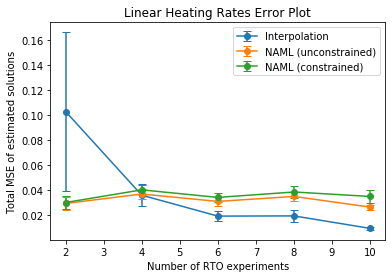

In [7]:
# Make plot

exp_nums = [2, 4, 6, 8, 10] # Number of experiments

interp_means = [np.mean(MSE_interp_dict_vanilla[i]) for i in exp_nums] 
interp_sems = [sem(MSE_interp_dict_vanilla[i]) for i in exp_nums] 
plt.errorbar(exp_nums,interp_means,yerr=interp_sems,label='Interpolation',marker='o', capsize=4)

ml_means = [np.mean(MSE_ml_dict_vanilla[i]) for i in exp_nums] 
ml_sems = [sem(MSE_ml_dict_vanilla[i]) for i in exp_nums] 
plt.errorbar(exp_nums,ml_means,yerr=ml_sems,label='NAML (unconstrained)',marker='o', capsize=4)

mlc_means = [np.mean(MSE_mlc_dict_vanilla[i]) for i in exp_nums] 
mlc_sems = [sem(MSE_mlc_dict_vanilla[i]) for i in exp_nums] 
plt.errorbar(exp_nums,mlc_means,yerr=mlc_sems,label='NAML (constrained)',marker='o', capsize=4)

plt.xlabel('Number of RTO experiments')
plt.ylabel('Total MSE of estimated solutions')
plt.title('Linear Heating Rates Error Plot')
plt.legend(loc='upper right')
plt.savefig(os.path.join('results','experimental_design','vanilla_error.png'))
plt.show()



#### Run for ramp-hold heating curves

In [4]:
# Compute MSEs for ramp-hold RTO curves

np.random.seed(999)

MAX_NUMBER_EXPERIMENTS = 10
NUMBER_TRIALS = 10

MSE_interp_dict_ramp = {}
MSE_ml_dict_ramp = {}
MSE_mlc_dict_ramp = {}


for num_heats in range(2,MAX_NUMBER_EXPERIMENTS+1, 2):
    print('Running for {} selected heating rates...'.format(str(num_heats)))
    
    # Simulate and collect MSEs
    MSEs_interp_ramp, MSEs_ml_ramp, MSEs_mlc_ramp = [], [], []
    t = 0
    while t < NUMBER_TRIALS:
        try:
            print('Running trial {} for ramp-hold RTO data models...'.format(str(t+1)))
            # Choose heating rates
            selected_hrs = np.random.choice(np.arange(1,16),num_heats,replace=False).tolist()
            selected_hrs = ['schedule_'+str(int(hr)) for hr in selected_hrs]

            # Build prediction models
            nainterp = NonArrheniusInterp(oil_type='synthetic', experiment='ramp_hold', 
                                        clean_data=False, heating_rates=selected_hrs)
            naml_unc = NonArrheniusML(oil_type='synthetic', experiment='ramp_hold', 
                                        clean_data=False, heating_rates=selected_hrs)
            naml_const = NonArrheniusML(oil_type='synthetic', experiment='ramp_hold', 
                                        clean_data=False, heating_rates=selected_hrs, constrained=True)

            # Compute error across all extrapolated heating rates
            MSE_interp, MSE_ml, MSE_mlc = 0, 0, 0
            for i, hr in enumerate(random_container.heating_rates):
                # Load data
                Time = random_container.Times[i,:]/60
                Temp = random_container.Temps[i,:]
                O2 = random_container.O2convs[i,:]

                # Run simulations
                y0=[0.0]
                tspan=[Time[0], Time[-1]]
                heating=[Time, Temp]
                t_interp, y_interp = nainterp.simulate_rto(y0, tspan, heating, max_temp=Temp.max())
                MSE_interp += np.mean((O2 - np.interp(Time, t_interp, np.squeeze(y_interp)))**2)

                t_ml, y_ml = naml_unc.simulate_rto(y0, tspan, heating, max_temp=Temp.max())
                MSE_ml += np.mean((O2 - np.interp(Time, t_ml, np.squeeze(y_ml)))**2)

                t_mlc, y_mlc = naml_const.simulate_rto(y0, tspan, heating, max_temp=Temp.max())
                MSE_mlc += np.mean((O2 - np.interp(Time, t_mlc, np.squeeze(y_mlc)))**2)

            # Log for iteration
            MSEs_interp_ramp.append(MSE_interp)
            MSEs_ml_ramp.append(MSE_ml)
            MSEs_mlc_ramp.append(MSE_mlc)

            t += 1 
            
        except:
             print('Trial failed for heating schedule {}!'.format(hr))
    
    # Record trials for MSE in dictionaries
    MSE_interp_dict_ramp[num_heats] = MSEs_interp_ramp
    MSE_ml_dict_ramp[num_heats] = MSEs_ml_ramp
    MSE_mlc_dict_ramp[num_heats] = MSEs_mlc_ramp
    

Running for 2 selected heating rates...
Running trial 1 for ramp-hold RTO data models...
Running trial 2 for ramp-hold RTO data models...
Trial failed for heating schedule schedule_1!
Running trial 2 for ramp-hold RTO data models...
Running trial 3 for ramp-hold RTO data models...
Running trial 4 for ramp-hold RTO data models...
Trial failed for heating schedule schedule_1!
Running trial 4 for ramp-hold RTO data models...
Running trial 5 for ramp-hold RTO data models...
Running trial 6 for ramp-hold RTO data models...
Trial failed for heating schedule schedule_1!
Running trial 6 for ramp-hold RTO data models...


C:\Users\timmya\Documents\Research\NAML\models.py:141: RuntimeWarning: invalid value encountered in less
  if y < 1.0:


Trial failed for heating schedule schedule_3!
Running trial 6 for ramp-hold RTO data models...
Trial failed for heating schedule schedule_1!
Running trial 6 for ramp-hold RTO data models...
Running trial 7 for ramp-hold RTO data models...
Trial failed for heating schedule schedule_1!
Running trial 7 for ramp-hold RTO data models...
Running trial 8 for ramp-hold RTO data models...
Running trial 9 for ramp-hold RTO data models...
Running trial 10 for ramp-hold RTO data models...
Running for 4 selected heating rates...
Running trial 1 for ramp-hold RTO data models...
Running trial 2 for ramp-hold RTO data models...
Running trial 3 for ramp-hold RTO data models...
Trial failed for heating schedule schedule_1!
Running trial 3 for ramp-hold RTO data models...
Trial failed for heating schedule schedule_1!
Running trial 3 for ramp-hold RTO data models...
Running trial 4 for ramp-hold RTO data models...
Running trial 5 for ramp-hold RTO data models...
Running trial 6 for ramp-hold RTO data mode

In [5]:
# Output dictionaries of simulation data
print(MSE_interp_dict_ramp)
print(MSE_ml_dict_ramp)
print(MSE_mlc_dict_ramp)


{2: [0.021463239172452464, 0.044035053145696196, 0.0893783649097329, 0.04204599340174259, 0.6788609115204531, 0.03027436798698981, 0.04347487550051724, 0.04310242392344909, 0.03303499987131708, 0.0036679608973207295], 4: [0.03179131023537485, 0.04305252755763579, 0.009220277333628828, 0.030864576007170824, 0.043216572623134726, 0.03249986965126205, 0.0373383100353413, 0.009230758982299657, 0.00955167468073947, 0.0971458685475922], 6: [0.02810976939164582, 0.0018828762499444693, 0.009602836965774244, 0.001915770428792403, 0.0016602130131990174, 0.009378128815831152, 0.030043344570864206, 0.0018955141001362127, 0.021724377654867955, 0.02999729657497371], 8: [0.010498680076808807, 0.0022957187478840247, 0.0022386598959058665, 0.02059339374888415, 0.025694674157032926, 0.0038599388913759325, 0.038685614944643426, 0.01018566373477563, 0.030163877584596856, 0.0019167280512734526], 10: [0.0034426035998069587, 0.007207048976312313, 0.0019528160790520353, 0.010235331162712734, 0.001907577869921

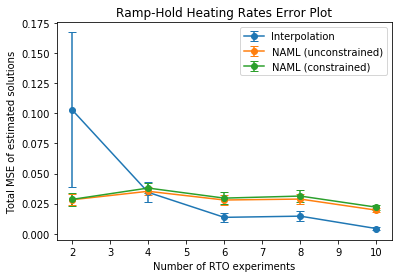

In [6]:
# Make plot

exp_nums = [2, 4, 6, 8, 10] # Number of experiments

interp_means = [np.mean(MSE_interp_dict_ramp[i]) for i in exp_nums] 
interp_sems = [sem(MSE_interp_dict_ramp[i]) for i in exp_nums] 
plt.errorbar(exp_nums,interp_means,yerr=interp_sems,label='Interpolation',marker='o', capsize=4)

ml_means = [np.mean(MSE_ml_dict_ramp[i]) for i in exp_nums] 
ml_sems = [sem(MSE_ml_dict_ramp[i]) for i in exp_nums] 
plt.errorbar(exp_nums,ml_means,yerr=ml_sems,label='NAML (unconstrained)',marker='o', capsize=4)

mlc_means = [np.mean(MSE_mlc_dict_ramp[i]) for i in exp_nums] 
mlc_sems = [sem(MSE_mlc_dict_ramp[i]) for i in exp_nums] 
plt.errorbar(exp_nums,mlc_means,yerr=mlc_sems,label='NAML (constrained)',marker='o', capsize=4)

plt.xlabel('Number of RTO experiments')
plt.ylabel('Total MSE of estimated solutions')
plt.title('Ramp-Hold Heating Rates Error Plot')
plt.legend(loc='upper right')
plt.savefig(os.path.join('results','experimental_design','ramp_error.png'))
plt.show()



In [10]:
# Compute MSEs for ramp-unramp-ramp-hold RTO curves

np.random.seed(999)

MAX_NUMBER_EXPERIMENTS = 10
NUMBER_TRIALS = 10

MSE_interp_dict_unramp = {}
MSE_ml_dict_unramp = {}
MSE_mlc_dict_unramp = {}


for num_heats in range(2,MAX_NUMBER_EXPERIMENTS+1, 2):
    print('Running for {} selected heating rates...'.format(str(num_heats)))
    
    # Simulate and collect MSEs
    MSEs_interp_unramp, MSEs_ml_unramp, MSEs_mlc_unramp = [], [], []
    t = 0
    while t < NUMBER_TRIALS:
        try:
            print('Running trial {} for ramp-hold RTO data models...'.format(str(t+1)))
            # Choose heating rates
            selected_hrs = np.random.choice(np.arange(1,16),num_heats,replace=False).tolist()
            selected_hrs = ['schedule_'+str(int(hr)) for hr in selected_hrs]

            # Build prediction models
            nainterp = NonArrheniusInterp(oil_type='synthetic', experiment='ramp_unramp_ramp', 
                                        clean_data=False, heating_rates=selected_hrs)
            naml_unc = NonArrheniusML(oil_type='synthetic', experiment='ramp_unramp_ramp', 
                                        clean_data=False, heating_rates=selected_hrs)
            naml_const = NonArrheniusML(oil_type='synthetic', experiment='ramp_unramp_ramp', 
                                        clean_data=False, heating_rates=selected_hrs, constrained=True)

            # Compute error across all extrapolated heating rates
            MSE_interp, MSE_ml, MSE_mlc = 0, 0, 0
            for i, hr in enumerate(random_container.heating_rates):
                # Load data
                Time = random_container.Times[i,:]/60
                Temp = random_container.Temps[i,:]
                O2 = random_container.O2convs[i,:]

                # Run simulations
                y0=[0.0]
                tspan=[Time[0], Time[-1]]
                heating=[Time, Temp]
                t_interp, y_interp = nainterp.simulate_rto(y0, tspan, heating, max_temp=Temp.max())
                MSE_interp += np.mean((O2 - np.interp(Time, t_interp, np.squeeze(y_interp)))**2)

                t_ml, y_ml = naml_unc.simulate_rto(y0, tspan, heating, max_temp=Temp.max())
                MSE_ml += np.mean((O2 - np.interp(Time, t_ml, np.squeeze(y_ml)))**2)

                t_mlc, y_mlc = naml_const.simulate_rto(y0, tspan, heating, max_temp=Temp.max())
                MSE_mlc += np.mean((O2 - np.interp(Time, t_mlc, np.squeeze(y_mlc)))**2)

            # Log for iteration
            MSEs_interp_unramp.append(MSE_interp)
            MSEs_ml_unramp.append(MSE_ml)
            MSEs_mlc_unramp.append(MSE_mlc)

            t += 1 
            
        except:
             print('Trial failed for heating schedule {}!'.format(hr))
    
    # Record trials for MSE in dictionaries
    MSE_interp_dict_unramp[num_heats] = MSEs_interp_unramp
    MSE_ml_dict_unramp[num_heats] = MSEs_ml_unramp
    MSE_mlc_dict_unramp[num_heats] = MSEs_mlc_unramp
    

Running for 2 selected heating rates...
Running trial 1 for ramp-hold RTO data models...
Running trial 2 for ramp-hold RTO data models...
Trial failed for heating schedule schedule_1!
Running trial 2 for ramp-hold RTO data models...
Running trial 3 for ramp-hold RTO data models...
Running trial 4 for ramp-hold RTO data models...
Trial failed for heating schedule schedule_1!
Running trial 4 for ramp-hold RTO data models...
Running trial 5 for ramp-hold RTO data models...
Running trial 6 for ramp-hold RTO data models...
Trial failed for heating schedule schedule_1!
Running trial 6 for ramp-hold RTO data models...
Trial failed for heating schedule schedule_3!
Running trial 6 for ramp-hold RTO data models...
Trial failed for heating schedule schedule_1!
Running trial 6 for ramp-hold RTO data models...
Running trial 7 for ramp-hold RTO data models...
Trial failed for heating schedule schedule_1!
Running trial 7 for ramp-hold RTO data models...
Trial failed for heating schedule schedule_1!
R

In [11]:
# Output dictionaries of simulation data
print(MSE_interp_dict_unramp)
print(MSE_ml_dict_unramp)
print(MSE_mlc_dict_unramp)


{2: [0.018833216676424486, 0.04226602647772698, 0.09213411800474693, 0.04317990774354184, 0.6860559590486806, 0.03666652244892858, 0.04188988021341256, 0.037769602721589295, 0.003648740617364058, 0.03618112300962854], 4: [0.04110720691078824, 0.04396061557774273, 0.044661887739614325, 0.007704639910815076, 0.027543859685071864, 0.04061222481014226, 0.004579916382743791, 0.0358473908578204, 0.0068510091743467115, 0.23731398549619637], 6: [0.006822882047747863, 0.018828351001273946, 0.006867685920001001, 0.006663745887511491, 0.0537599373506678, 0.002946377509859092, 0.006905005531518158, 0.030375180724739787, 0.01868019248732577, 0.00306502464622776], 8: [0.0021795992767340614, 0.017759539644720976, 0.018624401887210474, 0.022962429514460096, 0.004790037821109602, 0.021616850133448752, 0.018180223411091465, 0.002382415875915268, 0.03593304888285374, 0.006923980444615677], 10: [0.012273519716398035, 0.007375904946913018, 0.002239911841887155, 0.015067647095209188, 0.0015468521992294528, 

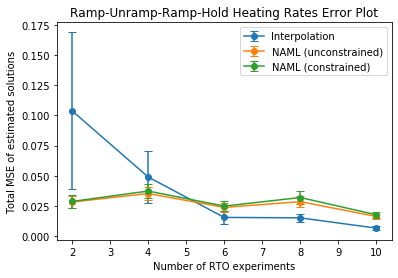

In [12]:
# Make plot

exp_nums = [2, 4, 6, 8, 10] # Number of experiments

interp_means = [np.mean(MSE_interp_dict_unramp[i]) for i in exp_nums] 
interp_sems = [sem(MSE_interp_dict_unramp[i]) for i in exp_nums] 
plt.errorbar(exp_nums,interp_means,yerr=interp_sems,label='Interpolation',marker='o', capsize=4)

ml_means = [np.mean(MSE_ml_dict_unramp[i]) for i in exp_nums] 
ml_sems = [sem(MSE_ml_dict_unramp[i]) for i in exp_nums] 
plt.errorbar(exp_nums,ml_means,yerr=ml_sems,label='NAML (unconstrained)',marker='o', capsize=4)

mlc_means = [np.mean(MSE_mlc_dict_unramp[i]) for i in exp_nums] 
mlc_sems = [sem(MSE_mlc_dict_unramp[i]) for i in exp_nums] 
plt.errorbar(exp_nums,mlc_means,yerr=mlc_sems,label='NAML (constrained)',marker='o', capsize=4)

plt.xlabel('Number of RTO experiments')
plt.ylabel('Total MSE of estimated solutions')
plt.title('Ramp-Unramp-Ramp-Hold Heating Rates Error Plot')
plt.legend(loc='upper right')
plt.savefig(os.path.join('results','experimental_design','unramp_error.png'))
plt.show()